Facial key point detection is crucial for emotional AI based applications like customer response,driver drowziness detection,sentiment anlysis,image filtering etc,while these tasks requires seprate discussion one thing that we find common in all of them that they may use facial keypoints to do so.In these project we will deal with a CNN archietecture to detect facial keypoints from images.So lets get started.

#1.Knowing the data.

In [ ]:
#lets import our faviourite library pandas.
import pandas as pd

In [ ]:
facialpoints_df=pd.read_csv('KeyFacialPoints.csv')
facialpoints_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,24.972418,36.348203,56.402841,31.171586,80.709708,30.595738,38.187845,30.595738,17.275454,29.534964,45.805390,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,15.979592,38.076531,56.941270,29.605102,81.314059,30.754762,35.059410,29.566780,8.578912,32.096032,53.649433,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,21.621652,39.095524,62.388142,32.089787,85.829396,38.724104,42.595762,30.541779,11.230184,34.485512,53.318891,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,16.850204,44.409861,51.463469,27.161327,77.354898,19.562755,34.135510,32.830102,9.731633,41.152347,54.075935,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


In [ ]:
facialpoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

As we can see we have 31 columns in our data first 30 columns provides the cordinates of various facial points of the corresponding image in the 31st column.The dataset provides x,y co-ordinates of facial keypoints of eyes, nose, mouth and eyebrows.

In [ ]:
#let's take look in one of the image
facialpoints_df['Image'][0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

Right now the image is displayed as an array of pixel values.Values of each pixel is between (0,255).0 indicates a white pixel and 255 indicates a black pixel and anything in between indicates a gray pixel.

In [ ]:
#to covert image array to array we will require numpy
import numpy as np
facialpoints_df['Image']=facialpoints_df['Image'].apply(lambda x:np.fromstring(x,dtype=int,sep=' ').reshape(96,96))

In [ ]:
#See that if the change in shape is done properly
facialpoints_df['Image'][0].shape

(96, 96)

In [ ]:
#Check whether any of our data has null values it can interrupt the training process
facialpoints_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

Now lets visualize our image and also lets plot these facial key points in the image to know what we are trying to do with these project i.e. how facial keypoints looks like in an actual image.Take a look at our dataframe.The co-ordinates are arranged with x and then y coordinates and it goes on for different elements of the face.This makes the plotting easier.

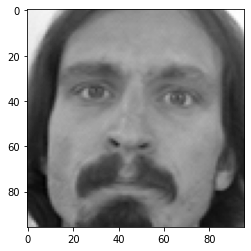

In [ ]:
#First lets see the image without the facial keypoints
#For that we will require matplotlib 
import matplotlib.pyplot as plt
plt.imshow(facialpoints_df['Image'][0],cmap='gray')

Now lets plot the corresponding facial keypoints in the image to do so we will run a loop from 1 to 31 with a step of 2 and plot the corresponding x and y coordinates in the image.In the first iteration i will be one and it will always point to the y cordinate thus i-1 will point to the x cordinates.

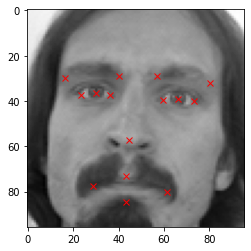

In [ ]:
plt.figure()
plt.imshow(facialpoints_df['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(facialpoints_df.loc[0][j-1],facialpoints_df.loc[0][j],'rx')
#Using loc command we can acces the value we are refering to.

Now lets visulize facial key points for a few more images that will be helpful to get the idea.

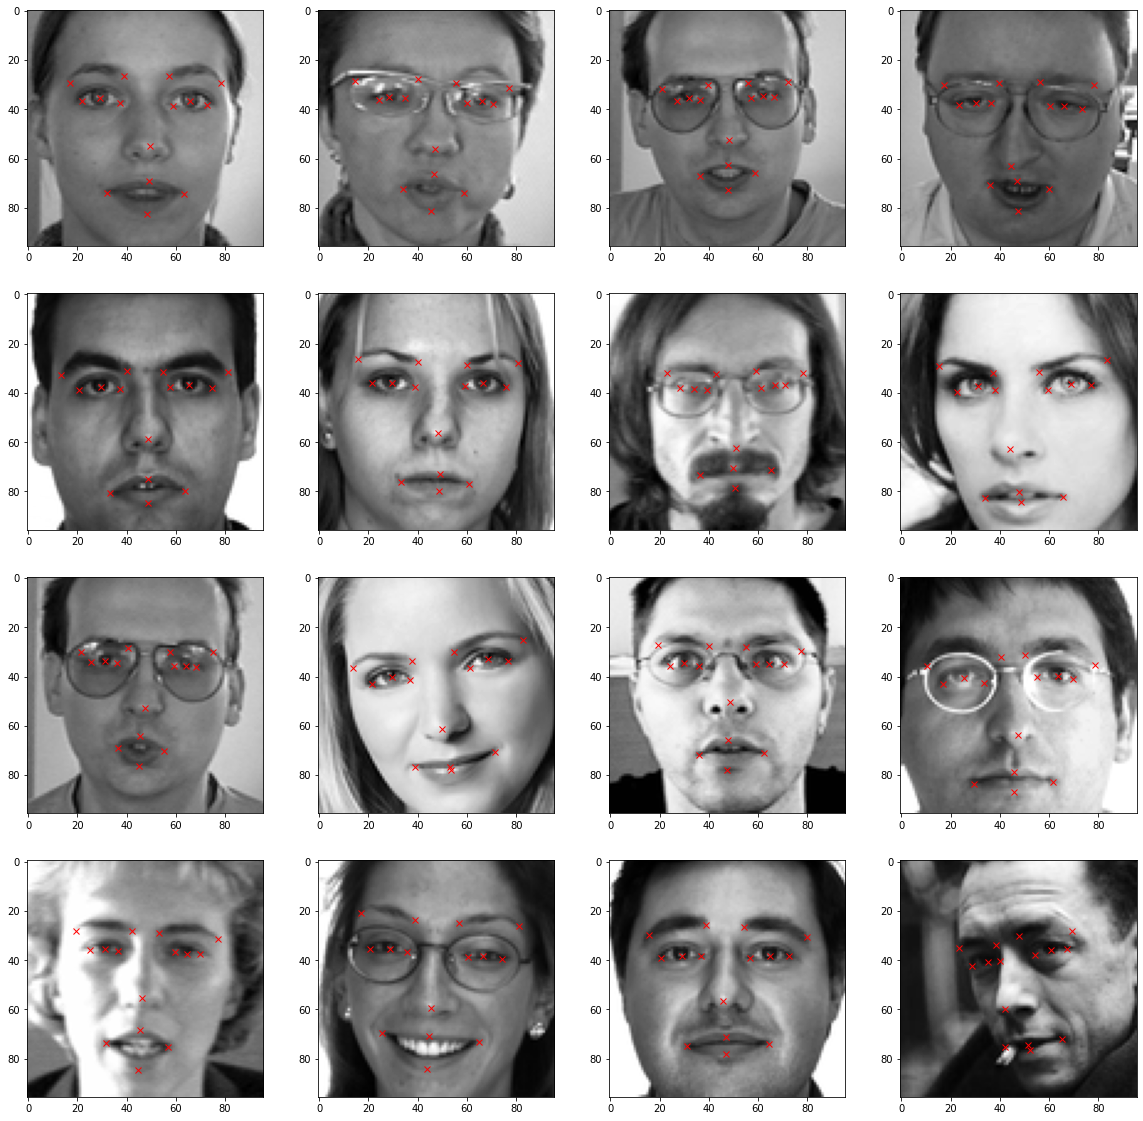

In [ ]:
#let's create a grid of images
#Restricting the fig size 20 X 20 pixels 
fig=plt.figure(figsize=(20,20))
for i in range(16):
  ax=fig.add_subplot(4,4,i+1)
  index=np.random.randint(1,len(facialpoints_df))
  image=plt.imshow(facialpoints_df['Image'][index],cmap='gray')
  for j in range(1,31,2):
    plt.plot(facialpoints_df.loc[index][j-1],facialpoints_df.loc[index][j],'rx')


Now that we have a idea of what we are tring to achieve can we go forward but there is still one problem our data isn't enough right now we have 2140 examples which will not be enough.If we train it now it wil have low accuracy and our model will not gerenealise well we need to perform data augmentation.

The idea of data augmentation is that we try to increase the size of the data with the data available in hand.For perfroming augmentation may be we can flip the image horizontally,verticlly or increase,decrese brightness of image.There are many methods for performing image augmentation.These listed are the ones done. 

In [ ]:
import copy
facialpoints_df_copy=copy.copy(facialpoints_df)

In [ ]:
columns=facialpoints_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

Lets first flip the images horizontally so that the new images have a different characteristics and can be used in training.One point which is worth noting that we applying augmentation to images only but if we flip the image the facial keypoints should also change with them so we also have to take care of that. 

numpy.ndarray

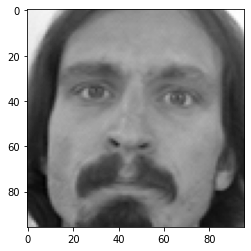

In [ ]:
plt.imshow(facialpoints_df['Image'][0],cmap='gray')
type(facialpoints_df['Image'][0])

Look at the values of pixels we want to know what happens to the pixel values when we flip the image.

In [ ]:
#Note that we are applying augmentation to the copy of the datafram and not the orignal dataframe.
facialpoints_df_copy['Image']=facialpoints_df_copy['Image'].apply(lambda x:np.flip(x,axis=1))

array([[250, 250, 250, ..., 237, 236, 238],
       [251, 250, 249, ..., 236, 238, 235],
       [250, 251, 251, ..., 237, 236, 237],
       ...,
       [ 60,  57,  52, ..., 181, 183, 186],
       [ 78,  69,  61, ..., 207, 188, 189],
       [ 90,  75,  70, ..., 184, 184, 191]])

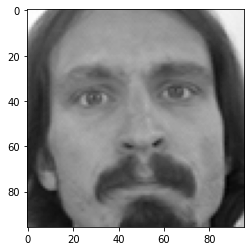

In [ ]:
plt.imshow(facialpoints_df_copy['Image'][0],cmap='gray')
facialpoints_df_copy['Image'][0]

The corresponding pixel values were also flipped and thses does makes sense as we flip each pixel values in a array the image is flipped.

Now we have to take care of the facial key points coordinates since we have messed up with the images we have to change pixel co-ordintes to improvise with the image.Since the images are flipped horizontally y coordinates will remain same and we only have to change the x coordinates.For this purpose all we need to do is substract the initial x coordinate values 96.

In [ ]:
for i in range(len(columns)):
  if i%2 ==0:
    facialpoints_df_copy[columns[i]]=facialpoints_df_copy[columns[i]].apply(lambda x:96. - float(x))

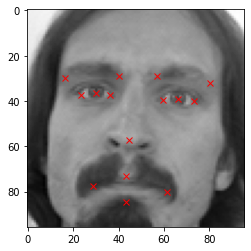

In [ ]:
#lets see if that worked well
#First the orignal image
plt.imshow(facialpoints_df['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(facialpoints_df.loc[0][j-1],facialpoints_df.loc[0][j],'rx')

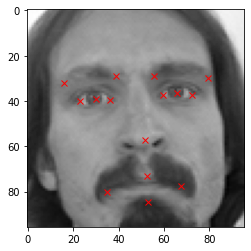

In [ ]:
#The fipped image
plt.imshow(facialpoints_df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(facialpoints_df_copy.loc[0][j-1],facialpoints_df_copy.loc[0][j],'rx')

In [ ]:
#If everything looks fine then concat the two strings
facialpoints_df_augmented=np.concatenate((facialpoints_df,facialpoints_df_copy))
facialpoints_df_augmented.shape

(4280, 31)

Now lets perform another image augmentation technique by randomly increasing the brighness of the image.

In [ ]:
import random
facialpoints_df_copy=copy.copy(facialpoints_df)
facialpoints_df_copy['Image']=facialpoints_df['Image'].apply(lambda x:np.clip(random.uniform(1, 2)* x, 0.0, 255.0))

In [ ]:
facialpoints_df_augmented=np.concatenate((facialpoints_df_augmented,facialpoints_df_copy))
facialpoints_df_augmented.shape

(6420, 31)

In [ ]:
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

In [ ]:
facialpoints_df_copy['Image'][0]

array([[255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       ...,
       [255.        , 255.        , 255.        , ..., 100.4960664 ,
        110.15914971, 115.95699969],
       [255.        , 255.        , 255.        , ..., 117.88961636,
        133.35054965, 150.7440996 ],
       [255.        , 255.        , 255.        , ..., 135.28316631,
        144.94624962, 173.93549954]])

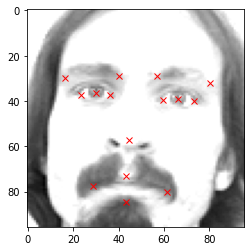

In [ ]:
#Again lets take a look at our augmented data
plt.imshow(facialpoints_df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(facialpoints_df_copy.loc[0][j-1],facialpoints_df_copy.loc[0][j],'rx')

In [ ]:
facialpoints_df_copy['Image'][0]

array([[255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       ...,
       [255.        , 255.        , 255.        , ..., 100.4960664 ,
        110.15914971, 115.95699969],
       [255.        , 255.        , 255.        , ..., 117.88961636,
        133.35054965, 150.7440996 ],
       [255.        , 255.        , 255.        , ..., 135.28316631,
        144.94624962, 173.93549954]])

Dont worry if you see no change in the images if you had applied the function properly it will work fine.Sometimes its hard to see changes in the image if it is only been affected by a small amount.

Now for one last time also flip the images vertially so that we have more data and we are done with image augmentation.

In [ ]:
#flip vertically
facialpoints_df_copy=copy.copy(facialpoints_df)
facialpoints_df_copy['Image']=facialpoints_df_copy['Image'].apply(lambda x:np.flip(x,axis=0))

In [ ]:
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

In [ ]:
facialpoints_df_copy['Image'][0]

array([[191, 184, 184, ...,  70,  75,  90],
       [189, 188, 207, ...,  61,  69,  78],
       [186, 183, 181, ...,  52,  57,  60],
       ...,
       [237, 236, 237, ..., 251, 251, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [238, 236, 237, ..., 250, 250, 250]])

In [ ]:
for i in range(len(columns)):
  if i%2 ==1:
    facialpoints_df_copy[columns[i]]=facialpoints_df_copy[columns[i]].apply(lambda x:96. - float(x))

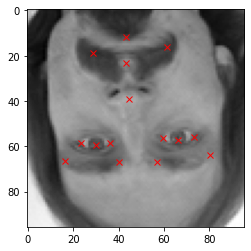

In [ ]:
plt.imshow(facialpoints_df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(facialpoints_df_copy.loc[0][j-1],facialpoints_df_copy.loc[0][j],'rx')

#Lets perform Normalization and training data preparation

In [ ]:
img=facialpoints_df_augmented[:,30]
img=img/255.

In [ ]:
X=np.empty((len(img),96,96,1))

In [ ]:
for i in range(len(img)):
  X[i,]=np.expand_dims(img[i],axis=2)

In [ ]:
X=np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [ ]:
y=facialpoints_df_augmented[:,:30]
y=np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers,optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,LearningRateScheduler
from tensorflow.keras import backend as K
from IPython.display import display
from keras import optimizers

In [ ]:
def res_block(X, filter, stage):
  X_copy = X
  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1), strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Add data from main and short paths
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
     
  # IDENTITY BLOCK 1
  X_copy = X
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
    
  # IDENTITY BLOCK 2
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X


In [ ]:
input_shape = (96,96,1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# Stage #1
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# Stage #2
X = res_block(X, filter= [64,64,256], stage= 2)

# Stage #3
X = res_block(X, filter= [128,128,512], stage= 3)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model = Model( inputs= X_input, outputs = X)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 102, 102, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
adam = tf.keras.optimizers.Adam(lr = 0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error", optimizer = adam, metrics = ['accuracy'])

In [ ]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "weights.hdf5", verbose = 1, save_best_only = True)

In [ ]:
#In case you want to train the model yourself
history = model.fit(X_train, y_train, batch_size = 256, epochs= 100, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/100
22/22 [==============================] - ETA: 0s - loss: 397.7415 - accuracy: 0.3097
Epoch 00001: val_loss improved from inf to 2023.82532, saving model to weights.hdf5
22/22 [==============================] - 112s 5s/step - loss: 397.7415 - accuracy: 0.3097 - val_loss: 2023.8253 - val_accuracy: 0.6920
Epoch 2/100
22/22 [==============================] - ETA: 0s - loss: 163.7348 - accuracy: 0.5154
Epoch 00002: val_loss improved from 2023.82532 to 1572.88049, saving model to weights.hdf5
22/22 [==============================] - 111s 5s/step - loss: 163.7348 - accuracy: 0.5154 - val_loss: 1572.8805 - val_accuracy: 0.6920
Epoch 3/100
22/22 [==============================] - ETA: 0s - loss: 107.1609 - accuracy: 0.5046
Epoch 00003: val_loss improved from 1572.88049 to 1232.37671, saving model to weights.hdf5
22/22 [==============================] - 111s 5s/step - loss: 107.1609 - accuracy: 0.5046 - val_loss: 1232.3767 - val_accuracy: 0.6920
Epoch 4/100
22/22 [===================

In [ ]:
model_json=model.to_json()
with open('KeyPointDetector.json','w') as json_file:
	json_file.write(model_json)

In [ ]:
#In case you want to work with pre-trained model with weights.hdf5 file
with open('KeyPointDetector.json','r') as json_file:
	json_SavedModel=json_file.read()
model=tf.keras.models.model_from_json(json_SavedModel)
model.load_weights('weights.hdf5')
model.compile(loss='mean_squared_error',optimizer=adam,metrics=['accuracy'])

In [ ]:
# Evaluate trained model

result = model.evaluate(X_test,y_test)
print("Accuracy : {}".format(result[1]))

In [ ]:
# Getting the model history keys 
history.history.keys()

In [ ]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:
# Make prediction using the testing dataset
df_predict = model.predict(X_test)

In [ ]:
# Print the rmse loss values

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, df_predict))
print("RMSE value : {}".format(rms))

In [ ]:
# Convert the predicted values into a dataframe

df_predict= pd.DataFrame(df_predict, columns = columns)
df_predict.head()

In [ ]:
# Plot the test images and their predicted keypoints

fig = plt.figure(figsize=(20, 20))

for i in range(8):
    ax = fig.add_subplot(4, 2, i + 1)
    # Using squeeze to convert the image shape from (96,96,1) to (96,96)
    plt.imshow(X_test[i].squeeze(),cmap='gray')
    for j in range(1,31,2):
            plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')